In [1]:
import pandas as pd

# load the csv file into a pandas dataframe
df = pd.read_csv('test1.csv', dtype=float)

# print the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 66 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nose_x              136 non-null    float64
 1   nose_y              136 non-null    float64
 2   left_eye_inner_x    136 non-null    float64
 3   left_eye_inner_y    136 non-null    float64
 4   left_eye_x          136 non-null    float64
 5   left_eye_y          136 non-null    float64
 6   left_eye_outer_x    136 non-null    float64
 7   left_eye_outer_y    136 non-null    float64
 8   right_eye_inner_x   136 non-null    float64
 9   right_eye_inner_y   136 non-null    float64
 10  right_eye_x         136 non-null    float64
 11  right_eye_y         136 non-null    float64
 12  right_eye_outer_x   136 non-null    float64
 13  right_eye_outer_y   136 non-null    float64
 14  left_ear_x          136 non-null    float64
 15  left_ear_y          136 non-null    float64
 16  right_ea

In [5]:
right_thumb_x = list(df['right_thumb_x'])
right_thumb_y = list(df['right_thumb_y'])
scale_x = [elem * 432 for elem in right_thumb_x]
scale_y = [elem * 768 for elem in right_thumb_y]
print(scale_x[0], scale_y[0])

203.45393085479736 436.2484588623047


In [15]:
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [16, 8]

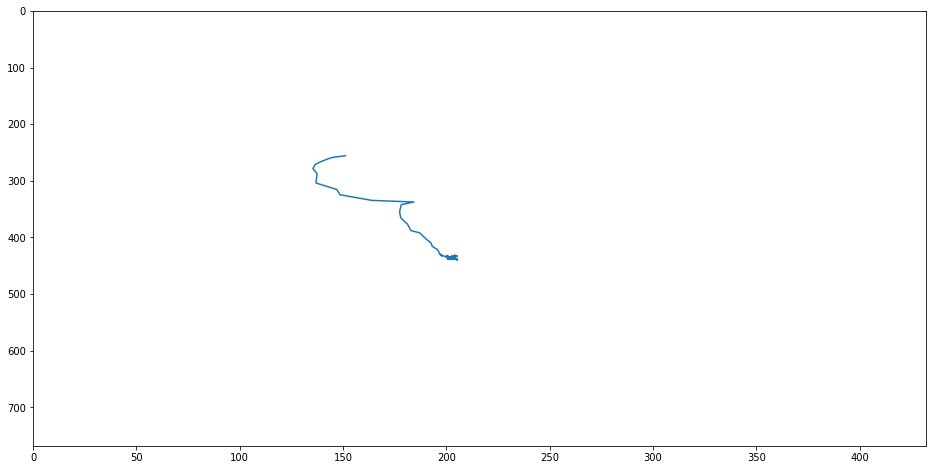

In [24]:
plt.xlim(0, 432)
plt.ylim(0, 768)
plt.gca().invert_yaxis()
plt.plot(scale_x[0:80], scale_y[0:80])

In [26]:
import numpy as np
from scipy.signal import savgol_filter
from golftracker import geom
# convert the coordinates to a numpy array
coordinates = geom.to_pairs(scale_x, scale_y)
path = np.array(coordinates)

# smooth the path using a Savitzky-Golay filter
smoothed_path = savgol_filter(path, window_length=11, polyorder=2, axis=0)


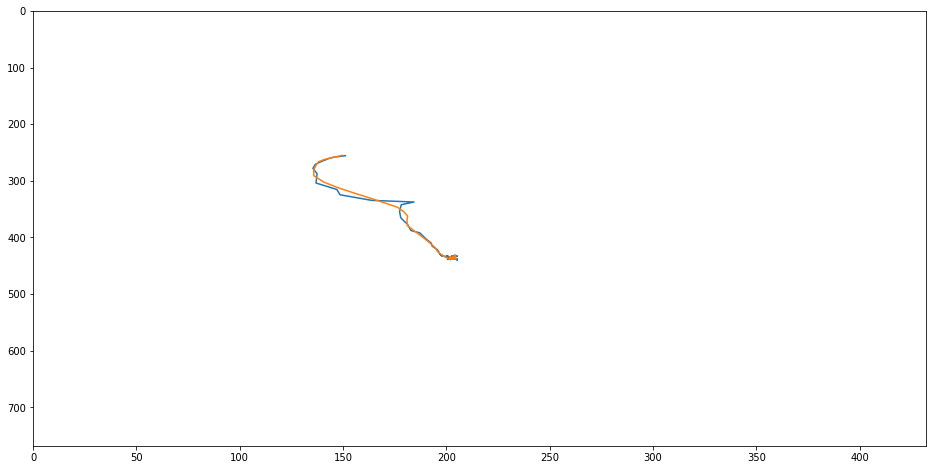

In [30]:
smooth_x, smooth_y = geom.split_pt(smoothed_path)
velocities = geom.compute_velocities(smoothed_path, 30)
plt.xlim(0, 432)
plt.ylim(0, 768)
plt.gca().invert_yaxis()
plt.plot(scale_x[0:80], scale_y[0:80])
plt.plot(smooth_x[0:80], smooth_y[0:80])
plt.show()

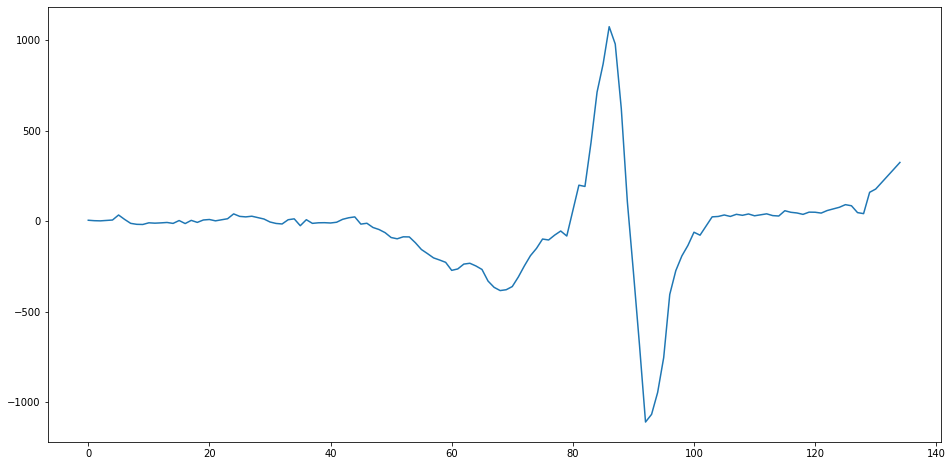

In [31]:
plt.plot(velocities)

In [33]:
max_idx = velocities.index(max(velocities))
max_idx

86

In [36]:
min_idx = velocities.index(min(velocities))
min_idx

92

In [38]:

# Example time intervals (in seconds)
times = [i for i in range(len(velocities))]

# Calculate the change in velocity
delta_v = [velocities[i+1] - velocities[i] for i in range(len(velocities)-1)]

# Calculate the time interval between each velocity measurement
delta_t = [times[i+1] - times[i] for i in range(len(times)-1)]

# Calculate the acceleration
accelerations = [delta_v[i] / delta_t[i] for i in range(len(delta_v))]



Acceleration: 2.46 m/s^2 (backward)
Acceleration: 0.91 m/s^2 (backward)
Acceleration: 2.08 m/s^2 (forward)
Acceleration: 2.58 m/s^2 (forward)
Acceleration: 27.68 m/s^2 (forward)
Acceleration: 24.34 m/s^2 (backward)
Acceleration: 21.81 m/s^2 (backward)
Acceleration: 5.35 m/s^2 (backward)
Acceleration: 0.83 m/s^2 (backward)
Acceleration: 9.17 m/s^2 (forward)
Acceleration: 1.93 m/s^2 (backward)
Acceleration: 1.60 m/s^2 (forward)
Acceleration: 2.22 m/s^2 (forward)
Acceleration: 5.14 m/s^2 (backward)
Acceleration: 15.83 m/s^2 (forward)
Acceleration: 16.69 m/s^2 (backward)
Acceleration: 17.56 m/s^2 (forward)
Acceleration: 11.12 m/s^2 (backward)
Acceleration: 13.32 m/s^2 (forward)
Acceleration: 2.65 m/s^2 (forward)
Acceleration: 7.42 m/s^2 (backward)
Acceleration: 6.06 m/s^2 (forward)
Acceleration: 5.59 m/s^2 (forward)
Acceleration: 26.84 m/s^2 (forward)
Acceleration: 13.85 m/s^2 (backward)
Acceleration: 2.77 m/s^2 (backward)
Acceleration: 3.71 m/s^2 (forward)
Acceleration: 8.02 m/s^2 (backwa

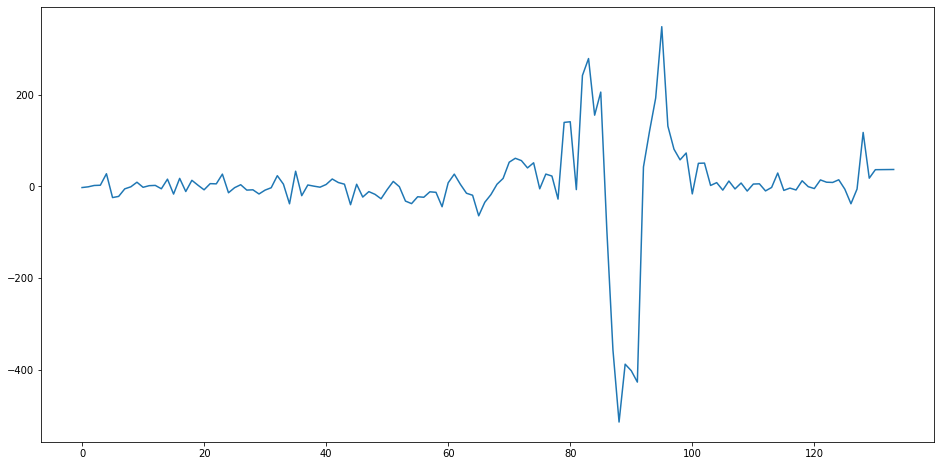

In [40]:
plt.plot(accelerations)